<a href="https://colab.research.google.com/github/shiyxg/KAUST_log/blob/master/ErSE290_Keras_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to login to Colab and use lab to run code blocks**

Colab is an online jupyter notebook server
  * create a gmail accout.
  * go to colab.research.google.com and login in your gmail account, click the shared libk to open the lab.
  * now, you can see python codes and our comments and some results.

To run the lab for youself:
  * **Choose runtime**: go to `Runtime`/`change runtime type`, and choose `GPU` as hardware.
  * **Connect Cloud server**: choose `connect`/`connect to hosted tuntime`

Wait for about 10 seconds, you can see the following image at the upper right of your brower, which means that you have get a cloud GPU server.

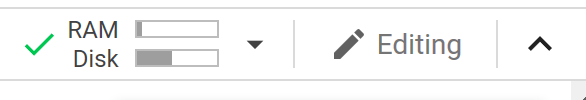



In [2]:
# <------click the button to run your code
# run python here, and you can see output below the code block
print('Hello, Google! We are from ErSE290')

Hello, Google! We are from ErSE290


# **The Workflow of A Machine Learning Project**

## 1 Get Data

---

We first import dependencies. We are using keras version 2.4.3. And keras is built from tensorflow 2.x

In [84]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist

# some tools to plot
from pylab import *
%matplotlib inline
from sklearn.model_selection import train_test_split

print("Keras version used: ", keras.__version__)
print("GPU imformation:", tf.test.gpu_device_name())

Keras version used:  2.4.3
GPU imformation: /device:GPU:0


MNIST dataset is loaded using **Keras datasets** and then split into train, validation and test sets using `train_test_split` function from scikit learn.

The loaded dataset is plotted using **matplotlib** library.

input size of trainset:(60000, 28, 28), input size of test:(10000, 28, 28)
input size of trainset:(60000,), input size of test:(10000,)


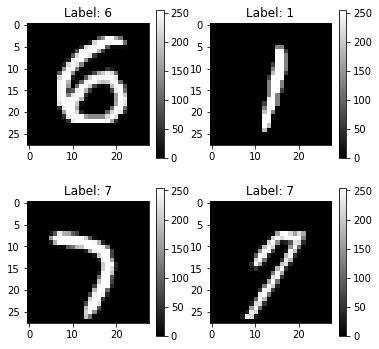

In [85]:
# download MNIST from server
(x, y), (x_test, y_test) = mnist.load_data()
print('input size of trainset:{}, input size of test:{}'.format(x.shape, x_test.shape))
print('input size of trainset:{}, input size of test:{}'.format(y.shape, y_test.shape))

# expand X from 3d matrix to a 4d matrix(n,w,h,c)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(x_train[i].reshape([28,28]),cmap='gray')
    colorbar()

## 2 Prepreocesses

---

In [86]:
# do some preprocesses so that X and Y could be feed to the model
n1,w,h = x_train.shape
X_train = x_train.reshape([n1, w,h, 1])
X_train = X_train.astype('float32')/255

n2,w,h = x_test.shape
X_test = x_test.reshape([n2, w, h,1])
X_test = X_test.astype('float32')/255

n3,w,h = x_val.shape
X_val = x_val.reshape([n3, w, h, 1])
X_val = X_val.astype('float32')/255

# preprocess label
from keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

print("label:{}, label after format:{}".format(y_val[10], Y_val[10,:]))

label:5, label after format:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 3 Create Model

---

In [87]:
! pwd

/content


A sequential model is defined now by stacking layers one on top of another.

In [88]:
import keras
from keras import layers, Sequential, Input
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout

def def_model_1():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
  model.add(Conv2D(filters=8, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=[2,2], padding="same"))
  
  model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
  
  model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.summary()
  return model

model = def_model_1()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

## 4 Train Model

Now, optimizer is defined (SGD for our case), follwed by the loss function and the metric to evaluate the model performance.

Finally we start the training process by calling `.fit` method.

---

In [89]:
from keras.optimizers import SGD, Adam
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), shuffle=True, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2949 - accuracy: 0.1338 - val_loss: 2.2859 - val_accuracy: 0.1677
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2740 - accuracy: 0.2354 - val_loss: 2.2626 - val_accuracy: 0.2960
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2447 - accuracy: 0.3483 - val_loss: 2.2258 - val_accuracy: 0.3995
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.1920 - accuracy: 0.4584 - val_loss: 2.1524 - val_accuracy: 0.5070
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.0740 - accuracy: 0.5449 - val_loss: 1.9699 - val_accuracy: 0.5634
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 1.7658 - accuracy: 0.5911 - val_loss: 1.5157 - val_accuracy: 0.6282
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 1.2192 - accuracy: 0.6868 - val_loss: 0.9771 - val_accuracy: 0.7313
Epoch 

Using the histroy recorded during training, various evaluation metrics such as train, validation loss/accuracy are plotted.

Finally the performace of the trained model on unseen examples are evaluated using .evaluate method.

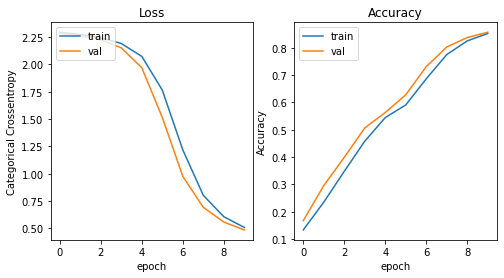

In [90]:
# summarize history for accuracy
figure(1, figsize=[8,4])
subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

## 5 Predict Test Data to Evalute Performance

Predictions on test dataset shown below

---

In [91]:
metrics = model.evaluate(X_test, Y_test)
Y_test_pred = model.predict(X_test)
print("Loss on test set: ", metrics[0])
print("Accuracy on test set: ", metrics[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4622 - accuracy: 0.8678
Loss on test set:  0.4621720314025879
Accuracy on test set:  0.8677999973297119


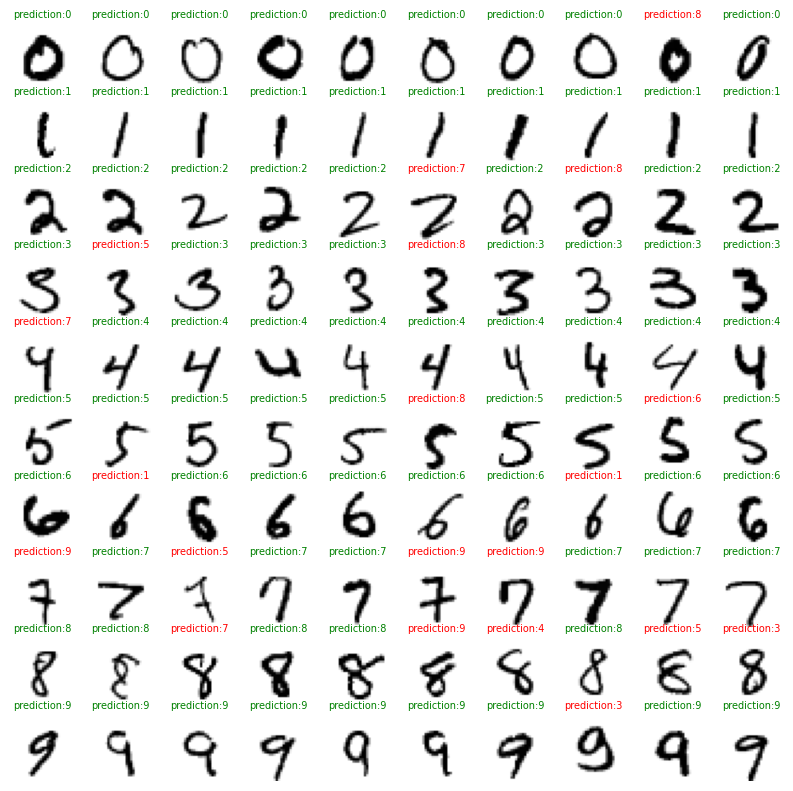

In [92]:
figure(3, figsize=[10,10], dpi=100)
y_pred = Y_test_pred.argmax(axis=1)
for i in range(100):
    ax = subplot(10,10,i+1)
    idx = np.where(y_test==(i//10))[0][i%10+100]
    a_image = X_test[idx,:,:, 0]
    imshow(a_image, cmap='gray_r')
    color = 'g' if y_pred[idx]==i//10 else 'r'
    title('prediction:{}'.format(y_pred[idx]), color=color, fontdict={'fontsize':7})
    ax.set_axis_off()

## 6 Improve Network

A sequential model is defined now by stacking layers one on top of another. So, by adding a lot of layers can lead to overfitting.

In [79]:
# prepare for the following test
m1, h1 = model, history

def plot_history(hs, comments=None):
  # h is a list of all result
  subplot(221)
  legends=[]
  for i, history in enumerate(hs):
    plt.plot(history.history['loss'])
    plt.ylabel('Loss')
    plt.title('CE in train set')
    plt.xlabel('epoch')
    if comments is not None:
      legends.append('{}'.format(comments[i]))
    else:
      legends.append('model:{}'.format(i))
  ylim([0,0.2])
  plt.legend(legends, loc='upper right')

  subplot(222)
  legends=[]
  for i, history in enumerate(hs):
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.title('CE in valid set')
    plt.xlabel('epoch')
    if comments is not None:
      legends.append('{}'.format(comments[i]))
    else:
      legends.append('model:{}'.format(i))
  ylim([0,0.2])
  plt.legend(legends, loc='upper right')

  subplot(223)
  legends=[]
  for i, history in enumerate(hs):
    plt.plot(history.history['accuracy'])
    plt.ylabel('Accuracy')
    plt.title('Accuracy in train set')
    plt.xlabel('epoch')
    if comments is not None:
      legends.append('{}'.format(comments[i]))
    else:
      legends.append('model:{}'.format(i))
  ylim([0.95,1])
  plt.legend(legends, loc='lower right')

  subplot(224)
  legends=[]
  for i, history in enumerate(hs):
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.title('Accuracy in valid set')
    plt.xlabel('epoch')
    if comments is not None:
      legends.append('{}'.format(comments[i]))
    else:
      legends.append('model:{}'.format(i))
  ylim([0.95,1])
  plt.legend(legends, loc='lower right')

### Model2: use Adam

for model2, we do not change the structure of the network. But the optimizer is replaced by Adam, also, we increase epoch to 20


---

In [93]:
def model_2():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
  model.add(Conv2D(filters=8, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=[2,2], padding="same"))
  
  model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
  
  model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.summary()

  # train
  opt = Adam(learning_rate=1e-3)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), shuffle=True, epochs=20, batch_size=128)
  return model, history

m2, h2 = model_2()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

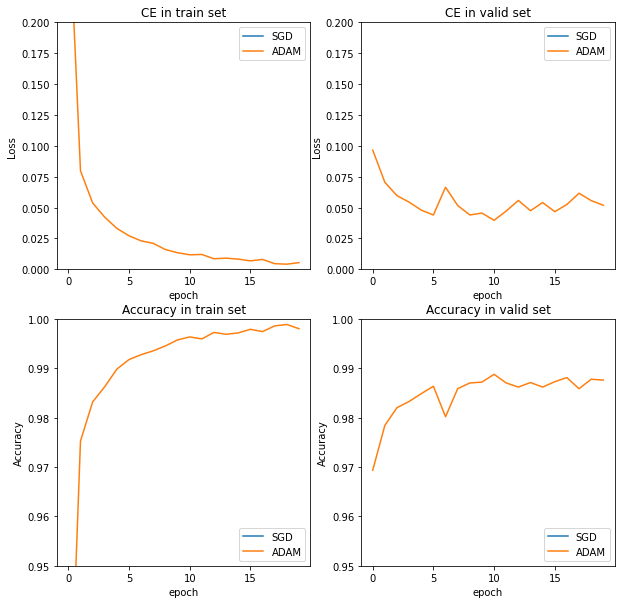

In [94]:
hs = [h1,h2]

figure(1, figsize=[10,10])
plot_history(hs, comments=['SGD','ADAM'])

### Model3: use BatchNormalization

---

In [95]:
def model_3():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
  model.add(Conv2D(filters=8, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=[2,2], padding="same"))
  
  model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
  
  model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(BatchNormalization())
  
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  
  model.add(Dense(10, activation='softmax'))

  model.summary()

  # train
  opt = Adam(learning_rate=1e-3)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), shuffle=True, epochs=20, batch_size=128)
  return model, history

m3, h3 = model_3()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 32)         

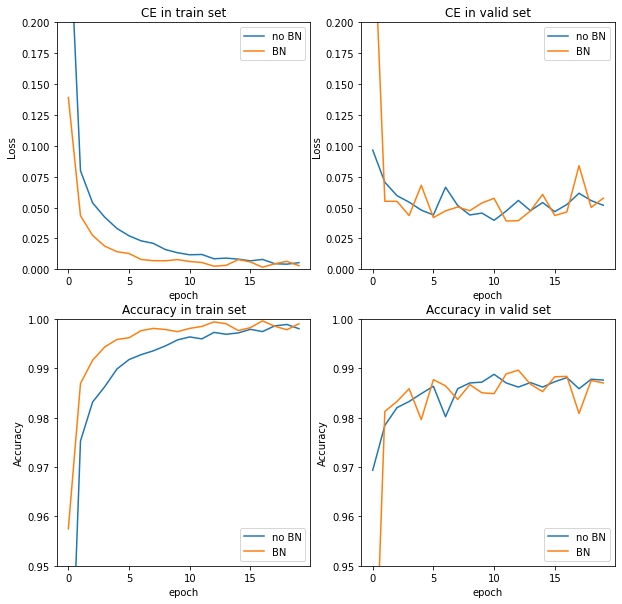

In [96]:
hs = [h2,h3]

figure(1, figsize=[10,10])
plot_history(hs, comments=['no BN','BN'])

### Model4: add Dropout to previent over-fitting

In [101]:
def model_4():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
  model.add(Conv2D(filters=8, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=[2,2], padding="same"))
  
  model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
  
  model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation="relu"))
  model.add(BatchNormalization())
  
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  model.summary()

  # train
  opt = Adam(learning_rate=1e-3)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), shuffle=True, epochs=20, batch_size=128)
  return model, history

m4, h4 = model_4()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_normalization_24 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 32)        

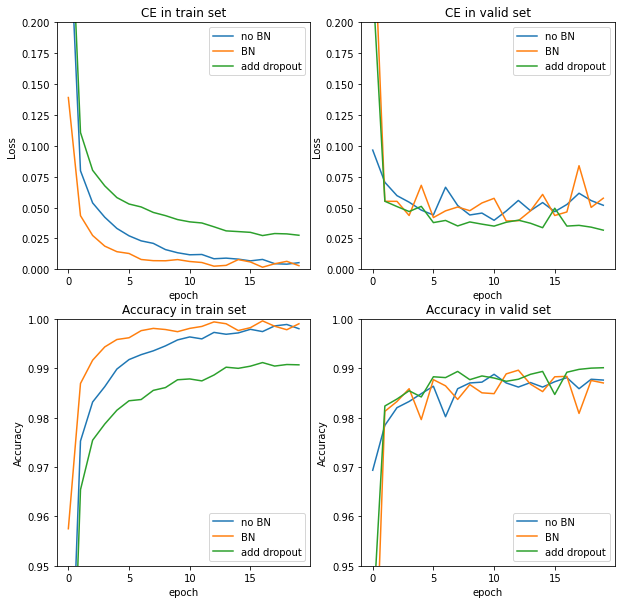

In [102]:
hs = [h2,h3, h4]

figure(1, figsize=[10,10])
plot_history(hs, comments=['no BN','BN','add dropout'])

### Model5 Leaky ReLu

In [103]:
from keras.layers import LeakyReLU
def model_5():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
  model.add(Conv2D(filters=8, kernel_size=3, strides=(1, 1), padding='same', activation=LeakyReLU()))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=[2,2], padding="same"))
  
  model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation=LeakyReLU()))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
  
  model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation=LeakyReLU()))
  model.add(BatchNormalization())
  
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation=LeakyReLU()))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation='softmax'))

  model.summary()

  # train
  opt = Adam(learning_rate=1e-3)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), shuffle=True, epochs=20, batch_size=128)
  return model, history

m5, h5 = model_5()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_normalization_28 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 32)        

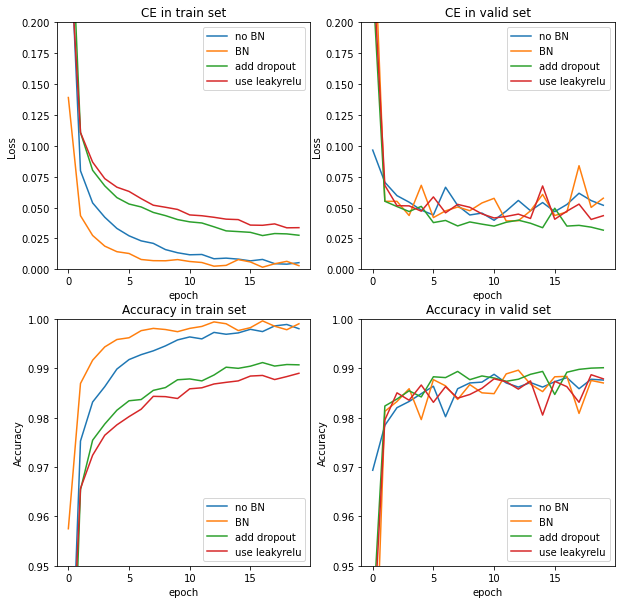

In [104]:
hs = [h2,h3, h4, h5]

figure(1, figsize=[10,10])
plot_history(hs, comments=['no BN','BN','add dropout', 'use leakyrelu'])